# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [70]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv')

plans = pd.read_csv('/datasets/megaline_plans.csv')

users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

print(plans.isnull().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [6]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

**No tenemos ningún valor faltante en este dataframe**

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**Considero que en este caso no hace falta un enriquecimiento, ya que es un dataframe muy pequeño**

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [9]:
print(users.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


**En este caso, los valores nulos nos están indicando que ese cliente sigue vigente dentro de la empresa, por eso no hay que eliminar ni hacer nada con ellos, solo comprenderlos como lo que son: clientes activos.**

### Corregir los datos

**Considero que no hay necesidad de corrección de datos**

### Enriquecer los datos

En este sentido voy a anexar la siguiente información, creo que es relevante para analizar el comportamiento del consumidor en este mercado:

    a) Edad promedio de los usuarios.
    b) La frecuencia de las ciudades. 

In [10]:
age_avt_users_calls = users['age'].mean()
print(age_avt_users_calls)

#Con este resultado tenemos que el consumidor promedio en la base de datos proporcionada tiene 45 años. 

45.486


In [11]:
# En este snippet presento el comportamiento general del consumo en cuanto a ciudades:

city_median_users = users['city'].mode()

print(city_median_users)

# De acuerdo a mi resultado tengo que el mejor conjunto de clientes para la empresa son los consumidores 
# ubicados en la sección descrita

0    New York-Newark-Jersey City, NY-NJ-PA MSA
dtype: object


### Top 20 áreas en las que se cuentan con más clientes

El apoyo gráfico ayuda a esbozar la diferencia en términos de fuerza por parte de la empresa en las distintas regiones en las que esta está presente.

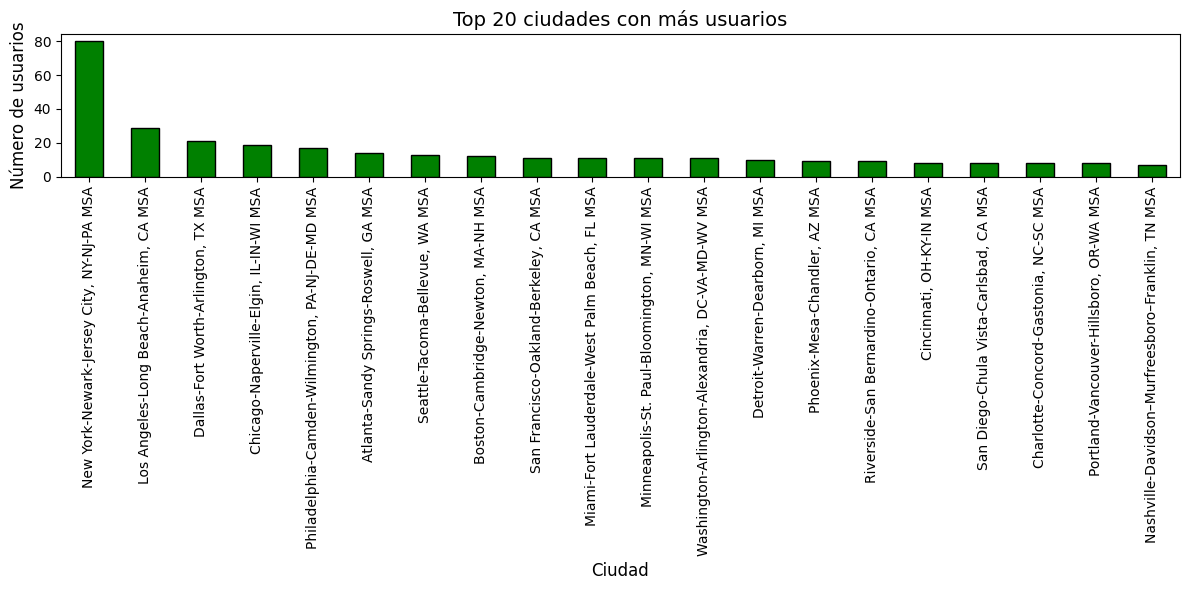

In [12]:
city_counts = users['city'].value_counts()
top_cities = city_counts.head(20)

ctop_cities = city_counts.head(20)
plt.figure(figsize=(12, 6))

top_cities.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 20 ciudades con más usuarios', fontsize=14)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.tight_layout()
plt.show()

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()
print(calls.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [14]:
# Imprime una muestra de datos para las llamadas

calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


**Tenemos la base de datos completa, y podemos proceder a trabajar con los datos originales**

### Corregir los datos

**No considero que este dataframe necesite una corrección, ya que como comento, está completa.**

### Enriquecer los datos

**Solo agregaré el máximo y el mínimo de duración de llamadas**

In [15]:
max_calls = calls['duration'].max()
print('De acuerdo con los registros, la llamada más larga es de:', max_calls, 'minutos.')

De acuerdo con los registros, la llamada más larga es de: 37.6 minutos.


In [16]:
min_calls = calls['duration'].min()
print('Y de acuerdo con los registros, la llamada más corta es de:', min_calls, 'minutos.')

Y de acuerdo con los registros, la llamada más corta es de: 0.0 minutos.


## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()
print(messages.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
id              0
user_id         0
message_date    0
dtype: int64


In [18]:
# Imprime una muestra de datos para los mensajes

messages.head(20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


**Al parecer tampoco tenemos datos faltantes, se tiene la base de datos completa.**

### Corregir los datos

**En este caso tampoco necesitamos hacer correcciones.**

### Enriquecer los datos

**En este caso, creo que es muy útil saber en qué fecha se mandaron más mensajes y en cuales se mandaron menos mensajes, para posteriormente hacer quizá una inferencia de cuál es la razón de ese resultado.**


In [19]:
messages_date_rep = messages['message_date'].value_counts()
print('De acuerdo con los registros, la fecha en la cual se mandaron más mensajes es:', messages_date_rep.idxmax())

print('Y esta es la fecha en la cual se mandaron menos mensajes:', messages_date_rep.idxmin())

De acuerdo con los registros, la fecha en la cual se mandaron más mensajes es: 2018-12-28
Y esta es la fecha en la cual se mandaron menos mensajes: 2018-01-19


**Tenemos que a fin de año tenemos el mayor flujo de mensajes por parte de los clientes, y que a principio de año los clientes mandan menos mensajes. Este comportamiento del consumidor es en cierto sentido estacionario.**

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()
print(internet.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [21]:
# Imprime una muestra de datos para el tráfico de internet

internet.head(20)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


**Basándome en el conteo que hago en el snippet de arriba, tenemos la base de datos completa y lista para trabajarla, considero que no hay que modificarla.**

### Corregir los datos

**No necesitamos corrección de datos**

### Enriquecer los datos

**Voy a agregar el consumo de internet mensual por usuario.**

In [22]:
#Convirtiendo a fechas
internet['session_date'] = pd.to_datetime(internet['session_date'])

#Agrupando para ver el comportamiento en consumo de internet:
internet_per_month = internet.groupby(['user_id', internet['session_date'].dt.month]).agg(
    mb_used=('mb_used', 'sum')
).reset_index()

print(internet_per_month)

      user_id  session_date   mb_used
0        1000            12   1901.47
1        1001             8   6919.15
2        1001             9  13314.82
3        1001            10  22330.49
4        1001            11  18504.30
...       ...           ...       ...
2272     1498            12  23137.69
2273     1499             9  12984.76
2274     1499            10  19492.43
2275     1499            11  16813.83
2276     1499            12  22059.21

[2277 rows x 3 columns]


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

#Convirtiendo a fecha:
calls['call_date'] = pd.to_datetime(calls['call_date'])
#Cálculo de consumo por mes:
calls_per_month = calls.groupby(['user_id', calls['call_date'].dt.month]).agg(
    calls_count=('duration', 'count'),
    total_minutes=('duration', 'sum')
).reset_index()

print(calls_per_month)

      user_id  call_date  calls_count  total_minutes
0        1000         12           16         116.83
1        1001          8           27         171.14
2        1001          9           49         297.69
3        1001         10           65         374.11
4        1001         11           64         404.59
...       ...        ...          ...            ...
2253     1498         12           39         324.77
2254     1499          9           41         330.37
2255     1499         10           53         363.28
2256     1499         11           45         288.56
2257     1499         12           65         468.10

[2258 rows x 4 columns]


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

id_min_month = calls_per_month[['user_id', 'total_minutes']]

print(id_min_month)

      user_id  total_minutes
0        1000         116.83
1        1001         171.14
2        1001         297.69
3        1001         374.11
4        1001         404.59
...       ...            ...
2253     1498         324.77
2254     1499         330.37
2255     1499         363.28
2256     1499         288.56
2257     1499         468.10

[2258 rows x 2 columns]


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

#Convirtiendo a fechas:
messages['message_date'] = pd.to_datetime(messages['message_date'])
#Calculo de mensajes mensuales:
messages_per_month = messages.groupby(['user_id', messages['message_date'].dt.month]).agg(
    messages_count=('message_date', 'count')
).reset_index()

print(messages_per_month)

      user_id  message_date  messages_count
0        1000            12              11
1        1001             8              30
2        1001             9              44
3        1001            10              53
4        1001            11              36
...       ...           ...             ...
1801     1496             9              21
1802     1496            10              18
1803     1496            11              13
1804     1496            12              11
1805     1497            12              50

[1806 rows x 3 columns]


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Convirtiendo a fechas
internet['session_date'] = pd.to_datetime(internet['session_date'])

#Agrupando para ver el comportamiento en consumo de internet:
internet_per_month = internet.groupby(['user_id', internet['session_date'].dt.month]).agg(
    mb_used=('mb_used', 'sum')
).reset_index()

print(internet_per_month)


      user_id  session_date   mb_used
0        1000            12   1901.47
1        1001             8   6919.15
2        1001             9  13314.82
3        1001            10  22330.49
4        1001            11  18504.30
...       ...           ...       ...
2272     1498            12  23137.69
2273     1499             9  12984.76
2274     1499            10  19492.43
2275     1499            11  16813.83
2276     1499            12  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

calls_per_month = calls_per_month.rename(columns={'call_date': 'month'})
messages_per_month = messages_per_month.rename(columns={'message_date': 'month'})
internet_per_month = internet_per_month.rename(columns={'session_date': 'month'})

user_data = pd.merge(calls_per_month, messages_per_month, 
                    on=['user_id', 'month'], how='outer')
user_data = pd.merge(user_data, internet_per_month, 
                    on=['user_id', 'month'], how='outer')

user_data = pd.merge(user_data, users[['user_id', 'plan']], on='user_id')
print(user_data.head())

   user_id  month  calls_count  total_minutes  messages_count   mb_used  \
0     1000     12         16.0         116.83            11.0   1901.47   
1     1001      8         27.0         171.14            30.0   6919.15   
2     1001      9         49.0         297.69            44.0  13314.82   
3     1001     10         65.0         374.11            53.0  22330.49   
4     1001     11         64.0         404.59            36.0  18504.30   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


In [39]:
# Añade la información de la tarifa

user_data['plan'] = user_data['user_id'].map(users.set_index('user_id')['plan'])

user_data


,user_id,month,calls_count,total_minutes,messages_count,mb_used,plan_x,plan_y,plan
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,ultimate,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,surf,surf,surf
2,1001,9,49.0,297.69,44.0,13314.82,surf,surf,surf
3,1001,10,65.0,374.11,53.0,22330.49,surf,surf,surf
4,1001,11,64.0,404.59,36.0,18504.30,surf,surf,surf
...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,ultimate,ultimate,ultimate
2289,1349,10,NaN,NaN,76.0,13093.55,surf,surf,surf
2290,1349,11,NaN,NaN,72.0,17128.26,surf,surf,surf
2291,1349,12,NaN,NaN,61.0,13039.91,surf,surf,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

<div class="alert alert-block alert-danger">
<b>Compilación</b> <a class="tocSkip"></a><br>
Gabriel, he detectado varios errores de compilación en tu notebook, lo que significa que hay celdas que no se pueden ejecutar correctamente y por lo tanto detienen el flujo del análisis. Cuando decimos que una celda "no compila", nos referimos a que el código dentro de esa celda genera un error cuando se ejecuta en Python, ya sea por falta de una columna, error de tipeo, uso de datos inexistentes o problemas con funciones mal definidas. A continuación, te detallo los errores más importantes:

• Celda [29]: Da error porque se intenta acceder a la columna <code>'plan'</code> que no existe como tal en el DataFrame <code>user_data</code>. Esto ocurre porque en una fusión previa duplicaste la columna y ahora se llama <code>'plan_x'</code> o <code>'plan_y'</code>. Para corregirlo, puedes eliminar la fusión de la celda [28] ya que la columna <code>'plan'</code> ya había sido incorporada correctamente en la celda [27].

• Celdas [30], [31], [32], [33], [34], [35], [36], [37], [38] y [39]: Todas estas celdas fallan porque intentan acceder a la columna <code>'plan'</code>, que, como se explicó antes, ya no existe directamente. Al haber dos columnas duplicadas llamadas <code>'plan_x'</code> y <code>'plan_y'</code>, cualquier llamada a <code>'plan'</code> resulta en error.

✔️ ¿Cómo puedes solucionarlo fácilmente?  
1. Elimina la fusión duplicada en la celda [28], ya que esa columna ya había sido incorporada correctamente.  
2. Asegúrate de que todas las celdas que usen la columna <code>'plan'</code> hagan referencia a la correcta (por ejemplo, podrías usar <code>'plan_x'</code> si es la válida o renombrarla de nuevo a <code>'plan'</code> con <code>user_data.rename(columns={'plan_x': 'plan'}, inplace=True)</code>).

Recuerda que una sola columna mal referenciada puede romper muchas celdas consecutivas, como fue tu caso. Si necesitas más ayuda, no dudes en consultar con tu TUTOR. Ellos pueden ayudarte paso a paso a revisar esta parte de tu código. ¡Ánimo! Lo que tienes hecho hasta ahora va muy bien, solo hay que corregir esta parte para que todo funcione perfectamente.
</div>



 Estadísticas descriptivas de los ingresos mensuales:
count    2293.000000
mean       61.947972
std        45.433323
min        20.000000
25%        22.156400
50%        70.000000
75%        70.000000
max       581.328509

 Ingresos por plan contratado:
               mean   median        std  count
plan                                          
surf      57.293784  36.6818  53.735882   1573
ultimate  72.116080  70.0000  10.768848    720

 Top 10 registros de ingresos:
 user_id  month     plan  total_minutes  messages_count  mb_used  monthly_revenue
    1000     12 ultimate         116.83            11.0  1901.47        70.000000
    1001      8     surf         171.14            30.0  6919.15        20.000000
    1001      9     surf         297.69            44.0 13314.82        20.000000
    1001     10     surf         374.11            53.0 22330.49        88.161191
    1001     11     surf         404.59            36.0 18504.30        50.706055
    1001     12     surf         

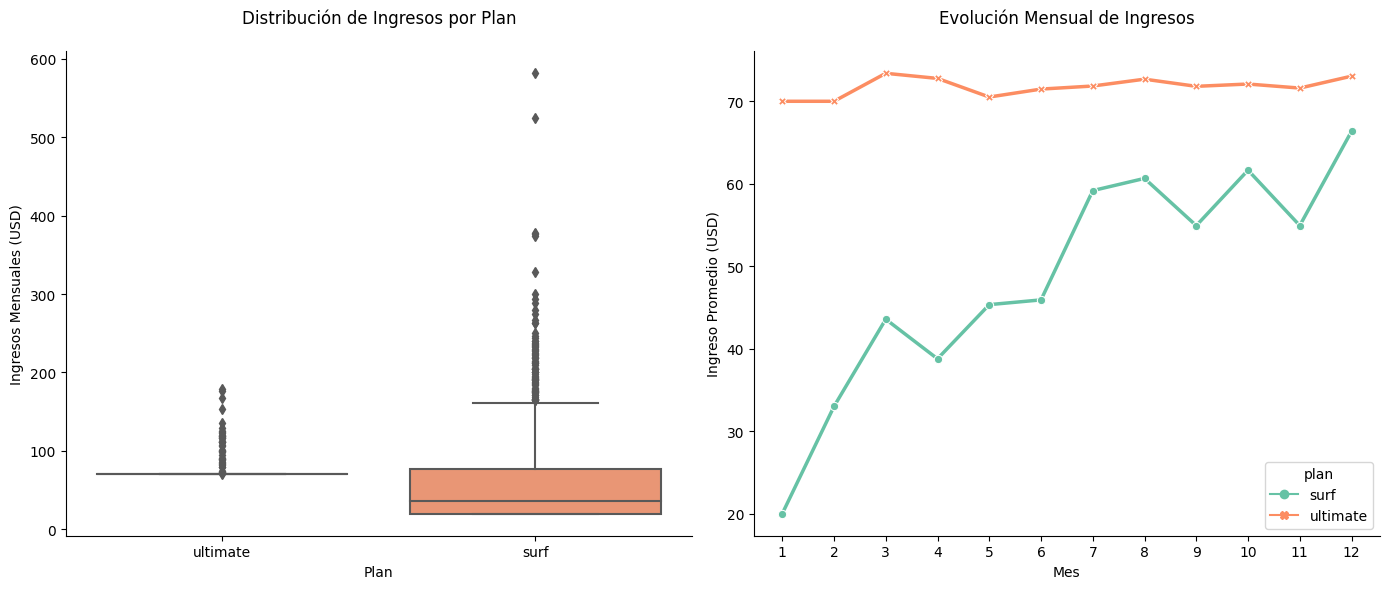

In [42]:
# Calcula el ingreso mensual para cada usuario

# Cálculo del ingreso

def calculate_revenue(row):
    """Calcula el ingreso mensual para cada usuario considerando su plan y uso"""
    # Corrección: 'plan' debe ser 'plans' (el DataFrame que contiene los detalles de las tarifas)
    plan_details = plans[plans['plan_name'] == row['plan']].iloc[0]
    monthly_charge = plan_details['usd_monthly_pay']
    
    # Manejo de valores nulos en los datos de uso
    total_minutes = row['total_minutes'] if pd.notnull(row['total_minutes']) else 0
    messages_count = row['messages_count'] if pd.notnull(row['messages_count']) else 0
    mb_used = row['mb_used'] if pd.notnull(row['mb_used']) else 0
    
    # Cálculo de excedentes con manejo de casos bordes
    extra_minutes = max(0, total_minutes - plan_details['minutes_included'])
    extra_messages = max(0, messages_count - plan_details['messages_included'])
    extra_mb = max(0, mb_used - plan_details['mb_per_month_included'])
    
    # Cálculo de cargos adicionales con conversión adecuada de MB a GB
    extra_charges = (extra_minutes * plan_details['usd_per_minute'] +
                    extra_messages * plan_details['usd_per_message'] +
                    extra_mb * (plan_details['usd_per_gb'] / 1024))  # Conversión correcta MB a GB
    
    return monthly_charge + extra_charges


user_data['monthly_revenue'] = user_data.apply(calculate_revenue, axis=1)

# Estadística descriptivas 
print("\n Estadísticas descriptivas de los ingresos mensuales:")
stats = user_data['monthly_revenue'].describe()
print(stats.to_string())

# Análisis por plan
print("\n Ingresos por plan contratado:")
plan_stats = user_data.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'std', 'count'])
print(plan_stats.to_string())

# Top 10 registros con formato tabular
print("\n Top 10 registros de ingresos:")
top_records = user_data[['user_id', 'month', 'plan', 'total_minutes', 
                        'messages_count', 'mb_used', 'monthly_revenue']].head(10)
print(top_records.to_string(index=False))

# Visualización
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=user_data, x='plan', y='monthly_revenue', palette='Set2')
plt.title('Distribución de Ingresos por Plan', fontsize=12, pad=20)
plt.ylabel('Ingresos Mensuales (USD)', fontsize=10)
plt.xlabel('Plan', fontsize=10)
sns.despine()

# Gráfico de tendencia mensual 
plt.subplot(1, 2, 2)
monthly_revenue = user_data.groupby(['month', 'plan'])['monthly_revenue'].mean().reset_index()
sns.lineplot(data=monthly_revenue, x='month', y='monthly_revenue', 
             hue='plan', style='plan', markers=True, dashes=False, 
             palette='Set2', linewidth=2.5)
plt.title('Evolución Mensual de Ingresos', fontsize=12, pad=20)
plt.ylabel('Ingreso Promedio (USD)', fontsize=10)
plt.xlabel('Mes', fontsize=10)
plt.xticks(range(1, 13))  
sns.despine()

plt.tight_layout()
plt.show()

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

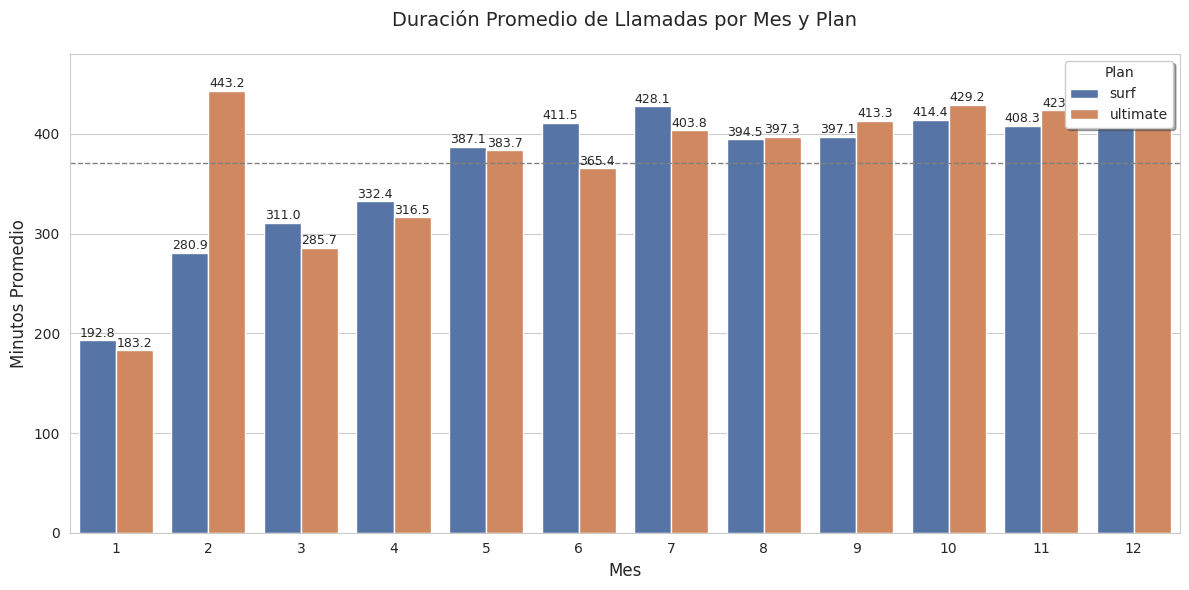

In [45]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

call_data = user_data.dropna(subset=['total_minutes'])

#Agrupación de los datos: 
monthly_avg = call_data.groupby(['month', 'plan'])['total_minutes'].mean().reset_index()

#Parte gráfica

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
palette = {"surf": "#4c72b0", "ultimate": "#dd8452"}

ax = sns.barplot(data=monthly_avg, 
                x='month', 
                y='total_minutes', 
                hue='plan',
                palette=palette,
                ci=None,  #
                saturation=0.8)

plt.title('Duración Promedio de Llamadas por Mes y Plan', 
         fontsize=14, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Minutos Promedio', fontsize=12)
plt.xticks(rotation=0)

plt.legend(title='Plan', 
          loc='upper right', 
          frameon=True, 
          shadow=True)


for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=9)
    
plt.axhline(y=monthly_avg['total_minutes'].mean(), 
            color='gray', 
            linestyle='--', 
            linewidth=1,
            label='Promedio general')

plt.tight_layout()
plt.show()



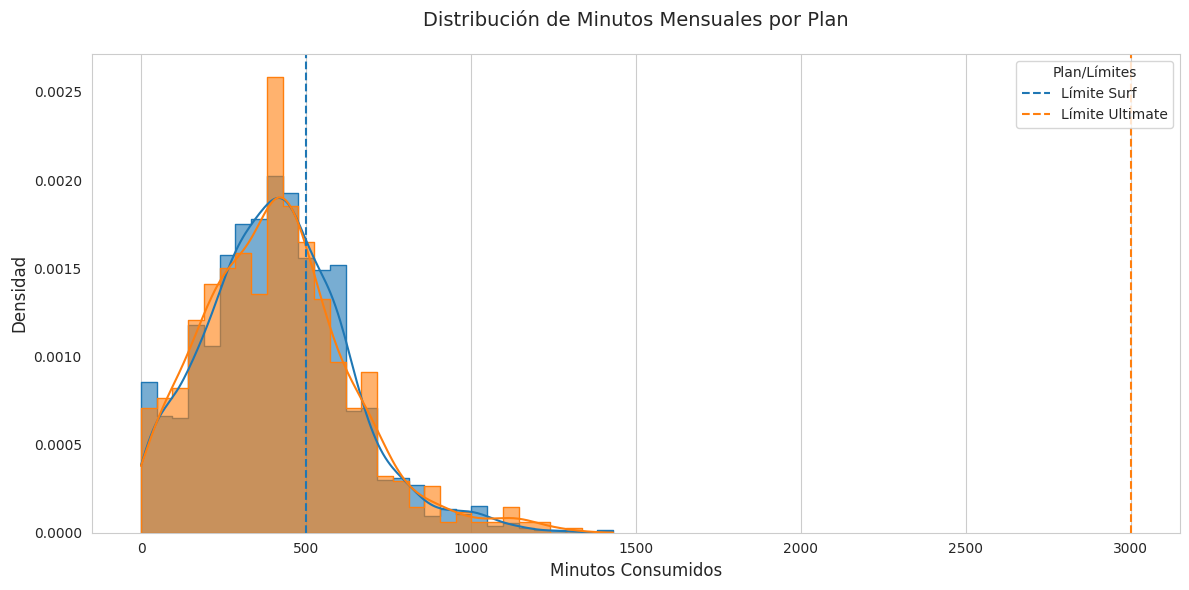

In [46]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


call_data = user_data.dropna(subset=['total_minutes']).copy()


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
colors = {"surf": "#1f77b4", "ultimate": "#ff7f0e"}  # Esquema de colores

# Histograma 
ax = sns.histplot(data=call_data, 
                 x='total_minutes', 
                 hue='plan',
                 bins=30, 
                 kde=True,  
                 palette=colors,
                 alpha=0.6,  
                 element="step",  
                 stat="density",  
                 common_norm=False)  


plt.title('Distribución de Minutos Mensuales por Plan', 
         fontsize=14, pad=20)
plt.xlabel('Minutos Consumidos', fontsize=12)
plt.ylabel('Densidad', fontsize=12)


plt.axvline(x=plans[plans['plan_name']=='surf']['minutes_included'].values[0], 
            color=colors['surf'], 
            linestyle='--', 
            linewidth=1.5,
            label='Límite Surf')

plt.axvline(x=plans[plans['plan_name']=='ultimate']['minutes_included'].values[0], 
            color=colors['ultimate'], 
            linestyle='--', 
            linewidth=1.5,
            label='Límite Ultimate')


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[2:], labels=labels[2:], 
           title='Plan/Límites', 
           loc='upper right', 
           frameon=True)


plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [47]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_data = user_data.dropna(subset=['total_minutes']).copy()

#Estadísticas para cada plan:
stats = call_data.groupby('plan')['total_minutes'].agg(['mean', 'var', 'std', 'count'])
stats.columns = ['Media (min)', 'Varianza', 'Desviación Estándar', 'Número de Usuarios']

stats_formatted = stats.style.format({
    'Media (min)': '{:.2f}',
    'Varianza': '{:.2f}',
    'Desviación Estándar': '{:.2f}'
})

print("Estadísticas de Duración Mensual de Llamadas por Plan")
display(stats_formatted)

surf_minutes = call_data[call_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = call_data[call_data['plan'] == 'ultimate']['total_minutes']


Estadísticas de Duración Mensual de Llamadas por Plan


,Media (min),Varianza,Desviación Estándar,Número de Usuarios
plan,,,,
surf,412.10,47001.25,216.80,1545
ultimate,410.18,50510.63,224.75,713


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

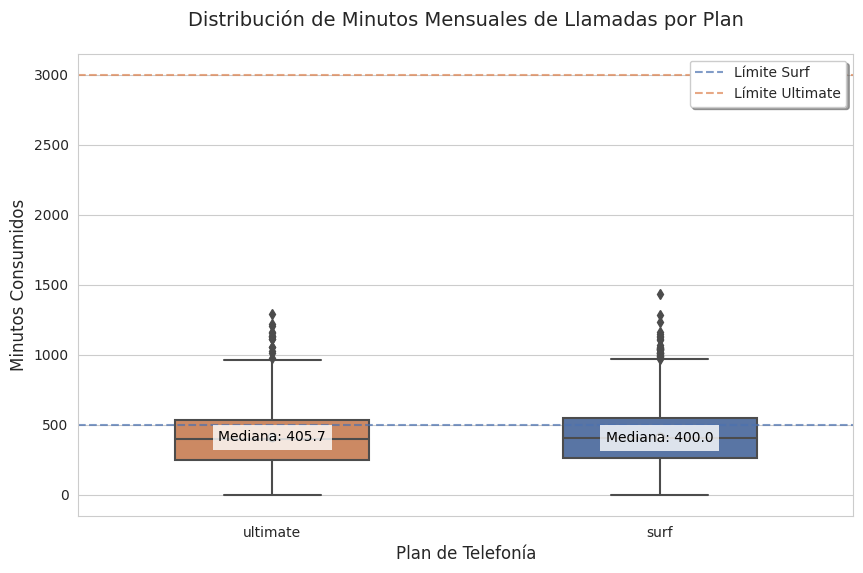

In [48]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = {"surf": "#4c72b0", "ultimate": "#dd8452"}


call_data = user_data.dropna(subset=['total_minutes']).copy()


box = sns.boxplot(
    data=call_data,
    x='plan',
    y='total_minutes',
    palette=palette,
    width=0.5,
    showmeans=True,  # Mostrar media
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)


plt.title('Distribución de Minutos Mensuales de Llamadas por Plan', pad=20, fontsize=14)
plt.xlabel('Plan de Telefonía', fontsize=12)
plt.ylabel('Minutos Consumidos', fontsize=12)


surf_limit = plans[plans['plan_name']=='surf']['minutes_included'].values[0]
ultimate_limit = plans[plans['plan_name']=='ultimate']['minutes_included'].values[0]

plt.axhline(y=surf_limit, color=palette['surf'], linestyle='--', alpha=0.7, label='Límite Surf')
plt.axhline(y=ultimate_limit, color=palette['ultimate'], linestyle='--', alpha=0.7, label='Límite Ultimate')


plt.legend(loc='upper right', frameon=True, shadow=True)


medians = call_data.groupby('plan')['total_minutes'].median()
for i, plan in enumerate(medians.index):
    box.text(i, medians[plan]+5, f'Mediana: {medians[plan]:.1f}', 
            ha='center', va='center', fontsize=10, color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))


plt.grid

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Para comenzar, hay que diferenciar la duración promedio de las llamadas con el consumo de minutos, esto es que en promedio en los dos grupos tenemos un consumo similar de minutos. Pero en lo que respecta al consumo real de minutos, este es muy distinto, y eso lo podemos ver en el histograma de minutos consumidos por usuario en el snippet de arriba; La línea de tendencia y el dato calculado de la varianza nos dejan ver que en cuanto a distribución, son similares, ya que tienen una concentración de datos no tan diferente.**

### Mensajes

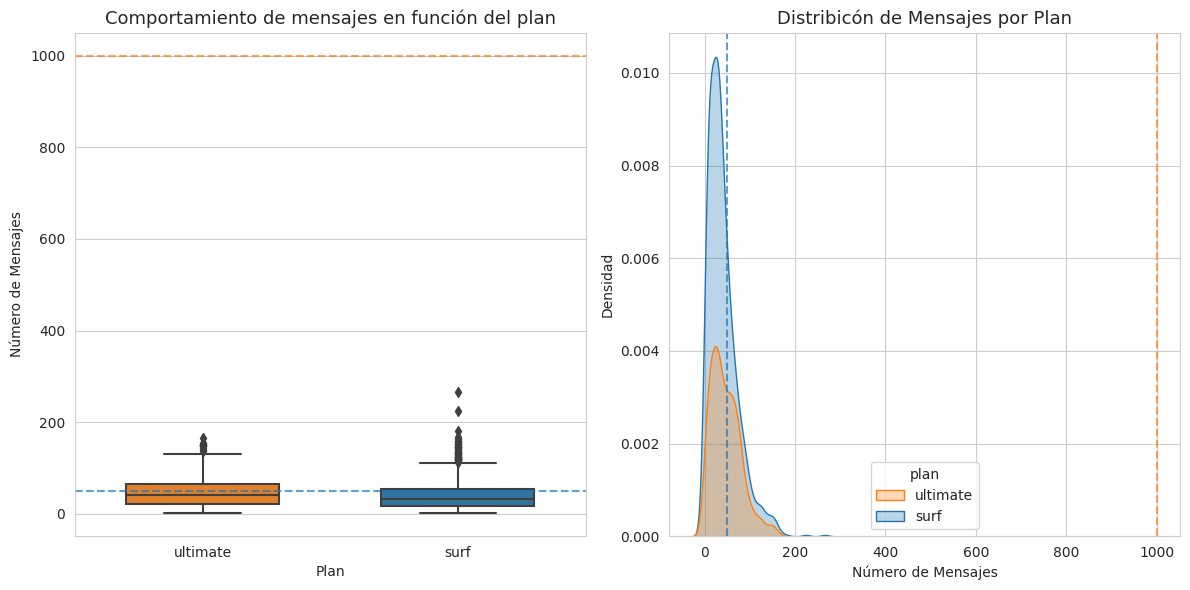


 Estadística de mensajes por plan:
              Media  Mediana  Desviación Estándar  Número de Usuarios
plan                                                                 
surf      40.109656     32.0            33.035500                1222
ultimate  46.296233     41.0            32.942118                 584

 Porcentaje de usuarios que exceden el límite de mensajes:
plan
surf        27.8%
ultimate     0.0%
Name: exceeds_limit, dtype: object


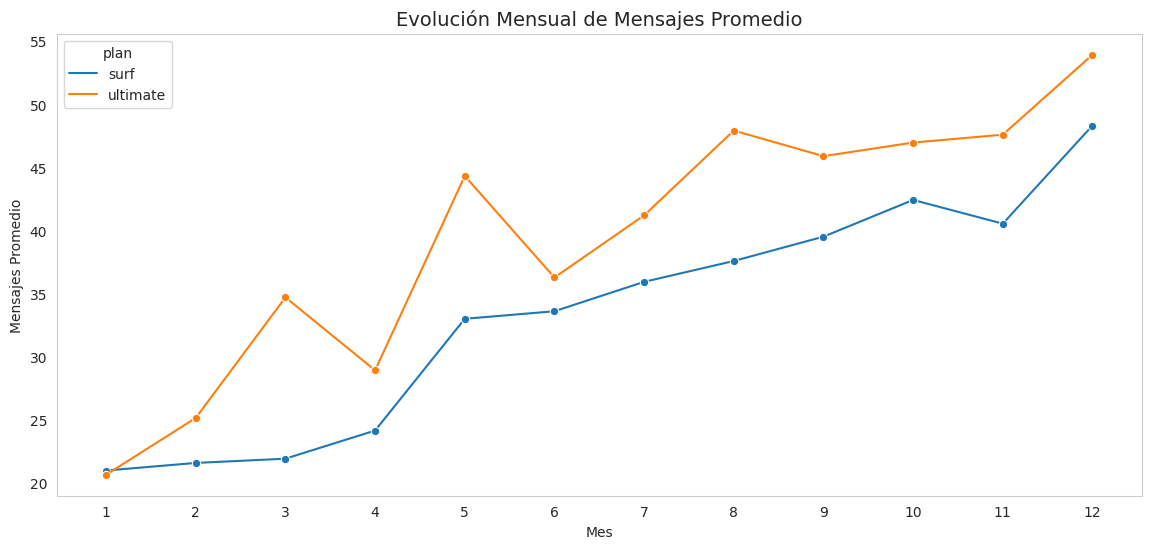

In [52]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

msg_data = user_data.dropna(subset=['messages_count']).copy()


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
palette = {"surf": "#1f77b4", "ultimate": "#ff7f0e"}


plt.subplot(1, 2, 1)
sns.boxplot(data=msg_data, x='plan', y='messages_count', palette=palette, width=0.6)
plt.title('Comportamiento de mensajes en función del plan', fontsize=13)
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes')


surf_msg_limit = plans[plans['plan_name']=='surf']['messages_included'].values[0]
ultimate_msg_limit = plans[plans['plan_name']=='ultimate']['messages_included'].values[0]

plt.axhline(y=surf_msg_limit, color=palette['surf'], linestyle='--', alpha=0.7)
plt.axhline(y=ultimate_msg_limit, color=palette['ultimate'], linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
sns.kdeplot(data=msg_data, x='messages_count', hue='plan', palette=palette, fill=True, alpha=0.3)
plt.title('Distribicón de Mensajes por Plan', fontsize=13)
plt.xlabel('Número de Mensajes')
plt.ylabel('Densidad')
plt.axvline(x=surf_msg_limit, color=palette['surf'], linestyle='--', alpha=0.7)
plt.axvline(x=ultimate_msg_limit, color=palette['ultimate'], linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Estadística descriptiva
print("\n Estadística de mensajes por plan:")
stats = msg_data.groupby('plan')['messages_count'].agg(['mean', 'median', 'std', 'count'])
stats.columns = ['Media', 'Mediana', 'Desviación Estándar', 'Número de Usuarios']
print(stats)

# sobre el Análisis de excedentes
msg_data['exceeds_limit'] = msg_data.apply(
    lambda row: row['messages_count'] > plans[plans['plan_name']==row['plan']]['messages_included'].values[0], 
    axis=1
)

print("\n Porcentaje de usuarios que exceden el límite de mensajes:")
print(msg_data.groupby('plan')['exceeds_limit'].mean().apply(lambda x: f"{x:.1%}"))

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=msg_data.groupby(['month', 'plan'])['messages_count'].mean().reset_index(),
    x='month',
    y='messages_count',
    hue='plan',
    palette=palette,
    marker='o'
)

plt.title('Evolución Mensual de Mensajes Promedio', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Mensajes Promedio')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.show()


### Internet

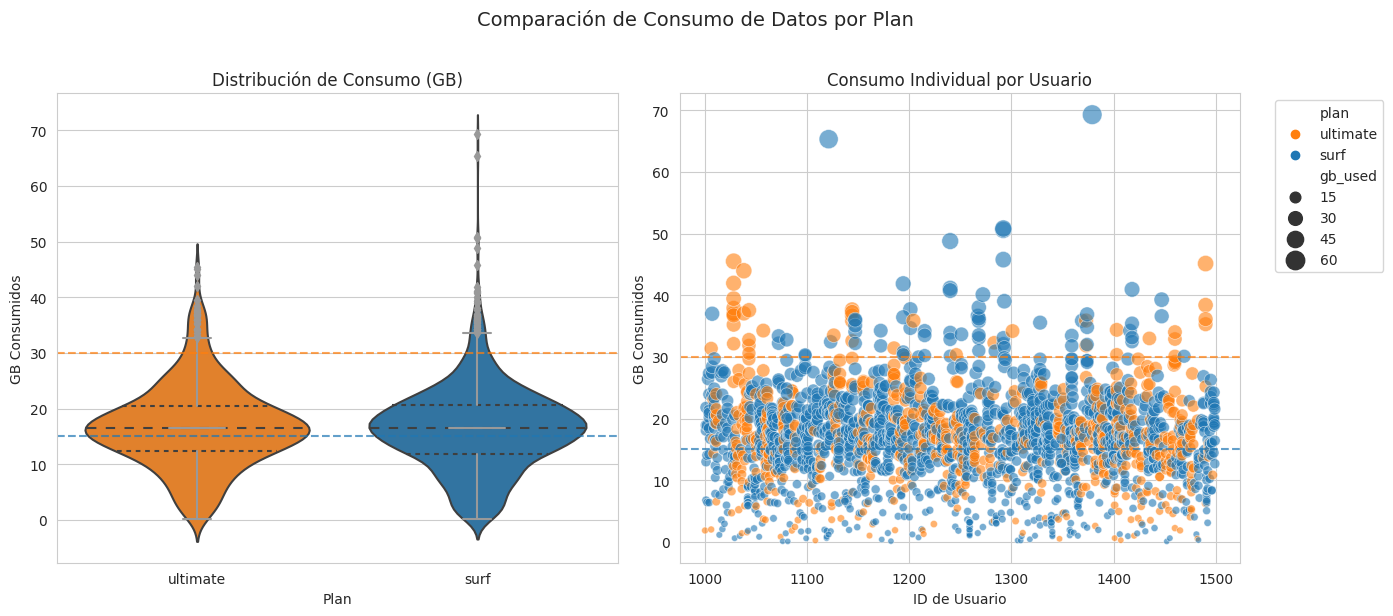

 Estadísticas de consumo de datos (GB):
              Media    Mediana  Desviación    Mínimo     Máximo
plan                                                           
surf      16.325881  16.527178    7.699886  0.090146  69.269131
ultimate  16.834612  16.468213    7.647479  0.227705  45.503252

 Porcentaje que excede límite de datos:
plan
surf        58.5%
ultimate     5.7%
Name: exceeds_limit, dtype: object


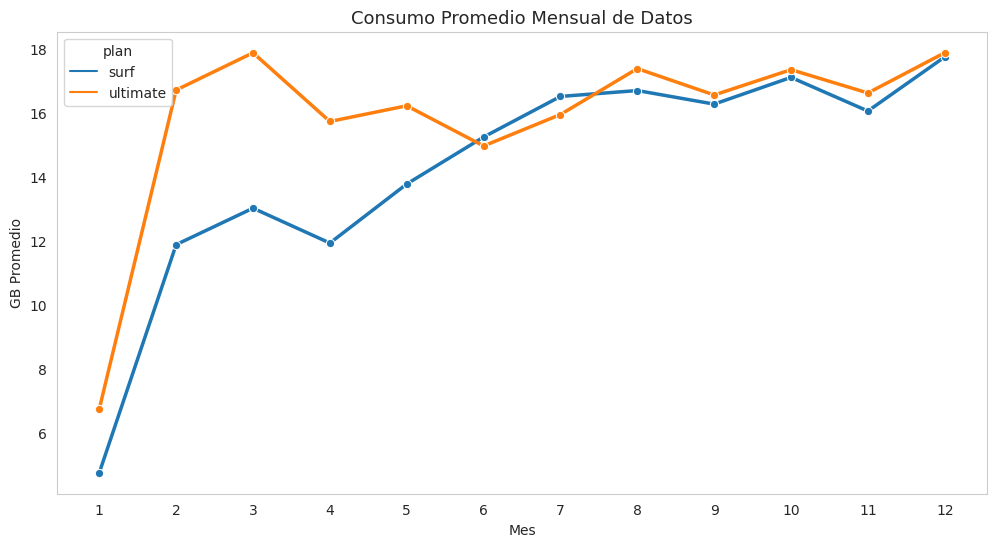

In [53]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan y comparando el uso de internet por plan

internet_data = user_data.dropna(subset=['mb_used']).copy()
internet_data['gb_used'] = internet_data['mb_used'] / 1024  #Hay que convertir de mehas a gigas

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
palette = {"surf": "#1f77b4", "ultimate": "#ff7f0e"}
plt.suptitle('Comparación de Consumo de Datos por Plan', y=1.02, fontsize=14)

plt.subplot(1, 2, 1)
sns.violinplot(data=internet_data, x='plan', y='gb_used', palette=palette, inner='quartile')
sns.boxplot(data=internet_data, x='plan', y='gb_used', width=0.2, color='white')
plt.title('Distribución de Consumo (GB)', fontsize=12)
plt.xlabel('Plan')
plt.ylabel('GB Consumidos')

surf_data_limit = plans[plans['plan_name']=='surf']['mb_per_month_included'].values[0]/1024
ultimate_data_limit = plans[plans['plan_name']=='ultimate']['mb_per_month_included'].values[0]/1024

plt.axhline(y=surf_data_limit, color=palette['surf'], linestyle='--', alpha=0.7)
plt.axhline(y=ultimate_data_limit, color=palette['ultimate'], linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.scatterplot(data=internet_data, x='user_id', y='gb_used', hue='plan', 
               palette=palette, alpha=0.6, size='gb_used', sizes=(20, 200))
plt.title('Consumo Individual por Usuario', fontsize=12)
plt.xlabel('ID de Usuario')
plt.ylabel('GB Consumidos')
plt.axhline(y=surf_data_limit, color=palette['surf'], linestyle='--', alpha=0.7)
plt.axhline(y=ultimate_data_limit, color=palette['ultimate'], linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#Parte de estadística descriptiva

print(" Estadísticas de consumo de datos (GB):")
stats = internet_data.groupby('plan')['gb_used'].agg(['mean', 'median', 'std', 'min', 'max'])
stats.columns = ['Media', 'Mediana', 'Desviación', 'Mínimo', 'Máximo']
print(stats)

internet_data['exceeds_limit'] = internet_data.apply(
    lambda row: row['mb_used'] > plans[plans['plan_name']==row['plan']]['mb_per_month_included'].values[0], 
    axis=1
)

internet_data['exceeds_limit'] = internet_data.apply(
    lambda row: row['mb_used'] > plans[plans['plan_name']==row['plan']]['mb_per_month_included'].values[0], 
    axis=1
)

print("\n Porcentaje que excede límite de datos:")
print(internet_data.groupby('plan')['exceeds_limit'].mean().apply(lambda x: f"{x:.1%}"))


plt.figure(figsize=(12, 6))
sns.lineplot(
    data=internet_data.groupby(['month', 'plan'])['gb_used'].mean().reset_index(),
    x='month',
    y='gb_used',
    hue='plan',
    palette=palette,
    marker='o',
    linewidth=2.5
)
plt.title('Consumo Promedio Mensual de Datos', fontsize=13)
plt.xlabel('Mes')
plt.ylabel('GB Promedio')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Con el gráfico concluyo que ambos planes tienen un uso muy similar, el valor de la mediana es prácticamente el mismo, eso en cuanto el uso de internet; puede ser que en el plan con mayor extensión de datos haya una parte importante de los datos ofrecidos que no se están usando, es decir que el cliente no está consumiento la totalidad de sus datos.**

**En cuanto a los mensajes, estos si hay una diferencia a favor del plan ultimate, ya que se consumen más**

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [65]:
# Ingresos promedio por plan (añado otras estadísticas descriptivas)

income_stats = user_data.groupby('plan').agg({
    'monthly_revenue': ['mean', 'median', 'std', 'count']
}).round(2)

print(income_stats)


         monthly_revenue                    
                    mean median    std count
plan                                        
surf               57.29  36.68  53.74  1573
ultimate           72.12  70.00  10.77   720


**Podemos ver que los ingresos pomedio son distintos, pero tampoco hay una brecha tan grande entre ellos.**

**Aún así, el plan ultimate tiene más ingreso promedio, este dato puede ser útil para mejorar los productos y tener precios más competitivos.**

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Tenemos que hacer una prueba de hipótesis de dos colas**

H0: Los ingresos promedio procedentes de los usuarios que consumen los planes no es distinto.

H1: Los ingresos promedio procedentes de los usuarios que consumen los planes es distinto. 

In [66]:
# Prueba las hipótesis

surf_revenue = user_data[user_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['monthly_revenue']

# Prueba t de Student
alpha = 0.05

results = st.ttest_ind(surf_revenue, ultimate_revenue)
print('valor p ', results.pvalue/2)

if results.pvalue/2 < alpha:
    print("Rechazamos la hipótesis nula, por lo tanto,el consumo es distinto.")
else:
    print("No podemos rechazar la hipótesis nula")

valor p  1.5470027209595281e-13
Rechazamos la hipótesis nula, por lo tanto,el consumo es distinto.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**También tenemos que hacer una prueba de hipótesis de 2 colas, y tenemos que:**

H0: Que el ingreso promedio es igual.

H1: Que el ingreso promedio en función de la ciudad es distinto

In [75]:
# Prueba las hipótesis

# Para estoy voy a crear otro df donde tenga un poco más a la mano la ciudad de New York para hacer la prueba de hipótesis
user_data0 = pd.merge(
    user_data,
    users[['user_id', 'city']],
    on='user_id',
    how='left')

print(user_data0)

ny_revenue = user_data0[user_data0['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

revenue0 = user_data0[user_data0['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

#Para la prueba t de student
alpha = 0.05

results = st.ttest_ind(ny_revenue, revenue0)

print('valor p:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print("Rechazamos la hipótesis nula, entonces el ingreso promedio es distinto.")
else:
    print("No podemos rechazar la hipótesis nula")


      user_id  month  calls_count  total_minutes  messages_count   mb_used  \
0        1000     12         16.0         116.83            11.0   1901.47   
1        1001      8         27.0         171.14            30.0   6919.15   
2        1001      9         49.0         297.69            44.0  13314.82   
3        1001     10         65.0         374.11            53.0  22330.49   
4        1001     11         64.0         404.59            36.0  18504.30   
...       ...    ...          ...            ...             ...       ...   
2288     1204     12          NaN            NaN            78.0  36730.05   
2289     1349     10          NaN            NaN            76.0  13093.55   
2290     1349     11          NaN            NaN            72.0  17128.26   
2291     1349     12          NaN            NaN            61.0  13039.91   
2292     1108     12          NaN            NaN             NaN    233.17   

        plan_x    plan_y      plan  monthly_revenue  \
0     ul

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**En general puedo decir que este tipo de análisis es muy aplicable en la industria, ya que nos esboza a grandes rasgos el comportamiento del consumidor, y es aplicable directamente a la innovación de productos y servicios: ya sea un nuevo producto o la mejora del mismo.**

**Concretamente de este análisis podemos decir que de acuerdo al gráfico que ofrezco, el ingreso promedio por mes del plan surf es creciente a lo largo de los meses, esto se puede deber a un buen trabajo de marketing, que represente mejores beneficios para los consumidores (ya que el consumidor trata de maximizar sus beneficios), paralelamente el ingreso mensual nos refleja una tendencia de consumo dentro de un periodo. Además puedo observar que dentro este gráfico, el plan ultimate se mantiene casi constante, habrá que innovar ese plan para repuntar hacia arriba (que de cualquier manera, el ingreso por ultimate es más elevado que en términos del ingreso por concepto de plan surf).**

**Siguiendo este análisis, de este trabajo se puede observar que la ubicación geográfica en términos de consumo juega un rol importante. Trabajar con estadística descriptiva nos da la oportunidad de contar ciertos hechos.**



# Comentario extra: ¿Qué tanto peso tiene la ubicación geográfica en términos de ingreso promedio?

Para esta sección extra, hice una regresión con sus respectivos componentes y usé el método de MCO para llegar a las conclusiones que aen esta parte del documento especificaré.

En este caso, tomo como variable dependiente el logaritmo del ingreso mensual y como variable explicativa las ciudades donde el producto está presente. De acuerdo a los resultados, este modelo solamente tiene un poder explicativo del 22.9 %, lo que en términos de este trabajo tiene relevancia (solo con motivos ilustrativos y de práctica), ya que la teoría econométrica nos dice que una regresión por debajo del 90% es una estimación débil y hay que considerar que solamente se consideró una variable, es normal que el R cuadrado salga bajo, relamente no se espera que la ubicación sea el gran determinante del ingreso promedio. A pesar de eso, un 22.9% del nivel explicativo da una buena proyección de la interacción entre las variables propuestas.

Además siguiendo esta regresión por mínimos cuadrados, tenemos que algunas ciudades tienen un impacto tanto positivo como negativo en el ingreso. Esto es de igual manera muy ilustrativo ya que tenemos una plena significancia estadística conjunta que nos indica la la prueba F de fisher.

Entonces, para los objetivos de este planteamiento extra, tenemos que la ubicación geográfica influye aproximadamente en un 22.9% cuando se trata del log del ingreso; como lo que estamos trabajando es una variable monetaria, y por tanto, se debe trabajar con el logaritmo, se ofrece de la misma manera el efecto multiplicativo para trabajar cabalmente con los coeficientes de la regresión por mínimos cuadrados ordinarios

Además, para tener un análisis más amplio, esbozo las 10 ciudades con ingreso promedio más alto ya que esta información puede ayudar a las empresas a direccionar el producto.

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     9.005
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           6.73e-81
Time:                        01:14:29   Log-Likelihood:                -2035.9
No. Observations:                2293   AIC:                             4220.
Df Residuals:                    2219   BIC:                             4644.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

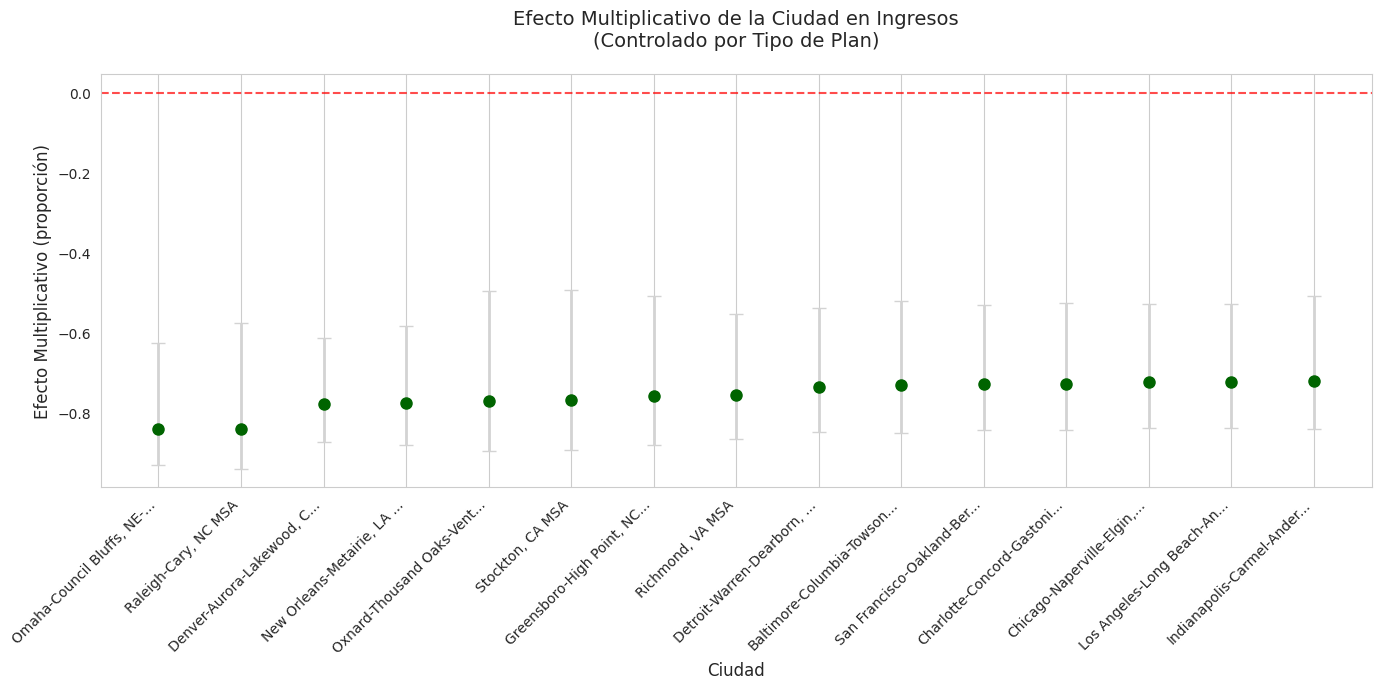


 Efecto del Plan Ultimate vs Surf (controlado por ciudad):
Efecto multiplicativo: 0.802 (80.2%)
IC 95%: [69.9%, 91.2%]
Significancia (p-valor): 0.0000


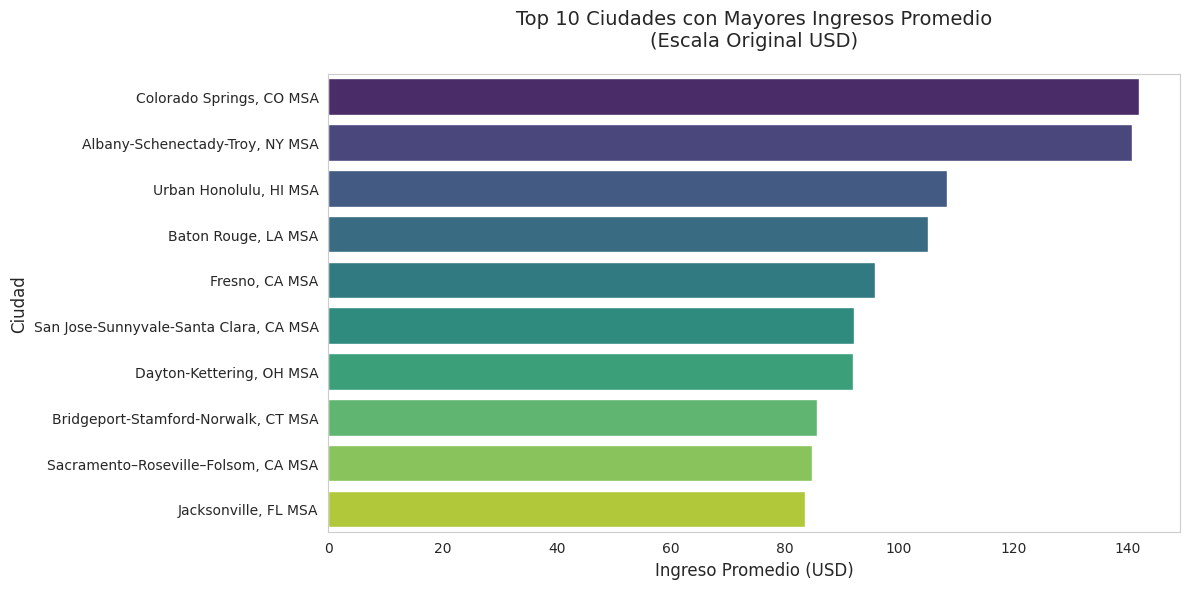

In [79]:
reg_data = user_data0[['city', 'plan_x', 'monthly_revenue']].dropna().copy()


reg_data['log_revenue'] = np.log(reg_data['monthly_revenue'] + 1e-6)


encoder = OneHotEncoder(drop='first', sparse=False)

if hasattr(encoder, 'set_output'): 
    encoder.set_output(transform="pandas")
    city_encoded = encoder.fit_transform(reg_data[['city']])
else:
    city_encoded = encoder.fit_transform(reg_data[['city']])
    city_encoded = pd.DataFrame(city_encoded, 
                              columns=encoder.get_feature_names(['city']))


plan_mapping = {'surf': 0, 'ultimate': 1}
reg_data['plan_encoded'] = reg_data['plan_x'].map(plan_mapping)


X = pd.concat([city_encoded, reg_data['plan_encoded']], axis=1)
y = reg_data['log_revenue']  


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())


plt.figure(figsize=(14, 7))
coeffs = np.exp(model.params[1:-1]) - 1  
ci = np.exp(model.conf_int().iloc[1:-1]) - 1


top_n = 15
sorted_idx = coeffs.abs().sort_values(ascending=False).index[:top_n]
coeffs = coeffs[sorted_idx]
ci = ci.loc[sorted_idx]


city_names = [name.split('city_')[1].replace('_', ' ')[:25] + ('...' if len(name.split('city_')[1]) > 25 else '') 
              for name in coeffs.index]


plt.errorbar(x=range(len(coeffs)), y=coeffs,
             yerr=[coeffs - ci[0], ci[1] - coeffs],
             fmt='o', color='darkgreen', ecolor='lightgray',
             elinewidth=2, capsize=5, markersize=8)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Efecto Multiplicativo de la Ciudad en Ingresos\n(Controlado por Tipo de Plan)', 
          pad=20, fontsize=14)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Efecto Multiplicativo (proporción)', fontsize=12)
plt.xticks(range(len(coeffs)), city_names, rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


print("\n Efecto del Plan Ultimate vs Surf (controlado por ciudad):")
plan_coef = np.exp(model.params['plan_encoded']) - 1  
plan_ci = np.exp(model.conf_int().loc['plan_encoded']) - 1

print(f"Efecto multiplicativo: {plan_coef:.3f} ({(plan_coef*100):.1f}%)")
print(f"IC 95%: [{(plan_ci[0]*100):.1f}%, {(plan_ci[1]*100):.1f}%]")
print(f"Significancia (p-valor): {model.pvalues['plan_encoded']:.4f}")


top_cities = reg_data.groupby('city')['monthly_revenue'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Ciudades con Mayores Ingresos Promedio\n(Escala Original USD)', 
          pad=20, fontsize=14)
plt.xlabel('Ingreso Promedio (USD)', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()